# Chapter 2 — An Array of Sequences

**Sections with code snippets in this chapter:**

* [List Comprehensions and Generator Expressions](#List-Comprehensions-and-Generator-Expressions)
* [Tuples Are Not Just Immutable Lists](#Tuples-Are-Not-Just-Immutable-Lists)
* [Unpacking sequences and iterables](#Unpacking-sequences-and-iterables)
* [Pattern Matching with Sequences](#Pattern-Matching-with-Sequences)
* [Slicing](#Slicing)
* [Using + and * with Sequences](#Using-+-and-*-with-Sequences)
* [Augmented Assignment with Sequences](#Augmented-Assignment-with-Sequences)
* [list.sort and the sorted Built-In Function](#list.sort-and-the-sorted-Built-In-Function)
* [When a List Is Not the Answer](#When-a-List-Is-Not-the-Answer)
* [Memory Views](#Memory-Views)
* [NumPy and SciPy](#NumPy-and-SciPy)
* [Deques and Other Queues](#Deques-and-Other-Queues)
* [Soapbox](#Soapbox)

## List Comprehensions and Generator Expressions

#### Example 2-1. Build a list of Unicode codepoints from a string

In [1]:
symbols = '$¢£¥€¤'
codes = []

for symbol in symbols:
    codes.append(ord(symbol))

codes

[36, 162, 163, 165, 8364, 164]

#### Example 2-2. Build a list of Unicode codepoints from a string, using a listcomp

In [2]:
symbols = '$¢£¥€¤'

codes = [ord(symbol) for symbol in symbols]

codes

[36, 162, 163, 165, 8364, 164]

#### Box: Listcomps No Longer Leak Their Variables

In [3]:
x = 'ABC'
codes = [ord(x) for x in x]
x

'ABC'

In [4]:
codes

[65, 66, 67]

In [5]:
codes = [last := ord(c) for c in x]
last

67

#### Example 2-3. The same list built by a listcomp and a map/filter composition

In [1]:
symbols = '$¢£¥€¤'
beyond_ascii = [ord(s) for s in symbols if ord(s) > 127]
beyond_ascii

[162, 163, 165, 8364, 164]

In [ ]:
# return a iterator
map(ord, symbols)

In [ ]:
# return a iterator
filter(lambda c: c > 127, map(ord, symbols))

In [4]:
beyond_ascii = list(filter(lambda c: c > 127, map(ord, symbols)))
beyond_ascii

[162, 163, 165, 8364, 164]

#### Example 2-4. Cartesian product using a list comprehension

In [5]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']
tshirts = [(color, size) for color in colors for size in sizes]
tshirts

[('black', 'S'),
 ('black', 'M'),
 ('black', 'L'),
 ('white', 'S'),
 ('white', 'M'),
 ('white', 'L')]

In [6]:
for color in colors:
    for size in sizes:
        print((color, size))

('black', 'S')
('black', 'M')
('black', 'L')
('white', 'S')
('white', 'M')
('white', 'L')


In [7]:
tshirts = [(color, size) for size in sizes
          for color in colors]
tshirts

[('black', 'S'),
 ('white', 'S'),
 ('black', 'M'),
 ('white', 'M'),
 ('black', 'L'),
 ('white', 'L')]

#### Example 2-5. Initializing a tuple and an array from a generator expression

In [11]:
symbols = '$¢£¥€¤'
tuple(ord(symbol) for symbol in symbols)

(36, 162, 163, 165, 8364, 164)

In [12]:
import array

array.array('I', (ord(symbol) for symbol in symbols))

array('I', [36, 162, 163, 165, 8364, 164])

#### Example 2-6. Cartesian product in a generator expression

In [13]:
colors = ['black', 'white']
sizes = ['S', 'M', 'L']

for tshirt in ('%s %s' % (c, s) for c in colors for s in sizes):
    print(tshirt)

black S
black M
black L
white S
white M
white L


## Tuples Are Not Just Immutable Lists

#### Example 2-7. Tuples used as records

In [14]:
lax_coordinates = (33.9425, -118.408056)
city, year, pop, chg, area = ('Tokyo', 2003, 32_450, 0.66, 8014)
traveler_ids = [('USA', '31195855'), ('BRA', 'CE342567'), ('ESP', 'XDA205856')]

for passport in sorted(traveler_ids):
    print('%s/%s' % passport)

BRA/CE342567
ESP/XDA205856
USA/31195855


In [15]:
for country, _ in traveler_ids:
    print(country)

USA
BRA
ESP


### Tuples as Immutable Lists

In [16]:
a = (10, 'alpha', [1, 2])
b = (10, 'alpha', [1, 2])
a == b

True

In [17]:
b[-1].append(99)
a == b

False

In [18]:
b

(10, 'alpha', [1, 2, 99])

In [19]:
def fixed(o):
    try:
        hash(o)
    except TypeError:
        return False
    return True


tf = (10, 'alpha', (1, 2))  # Contains no mutable items
tm = (10, 'alpha', [1, 2])  # Contains a mutable item (list)
fixed(tf)

True

In [20]:
fixed(tm)

False

## Unpacking sequences and iterables

In [21]:
lax_coordinates = (33.9425, -118.408056)
latitude, longitude = lax_coordinates  # unpacking
latitude

33.9425

In [22]:
longitude

-118.408056

In [8]:
divmod(20, 8)

(2, 4)

In [49]:
t = (20, 8)
# divmod(t) #TypeError: divmod expected 2 arguments, got 1
divmod(*t)  # unpacking

(2, 4)

In [55]:
*a, = t
a

[20, 8]

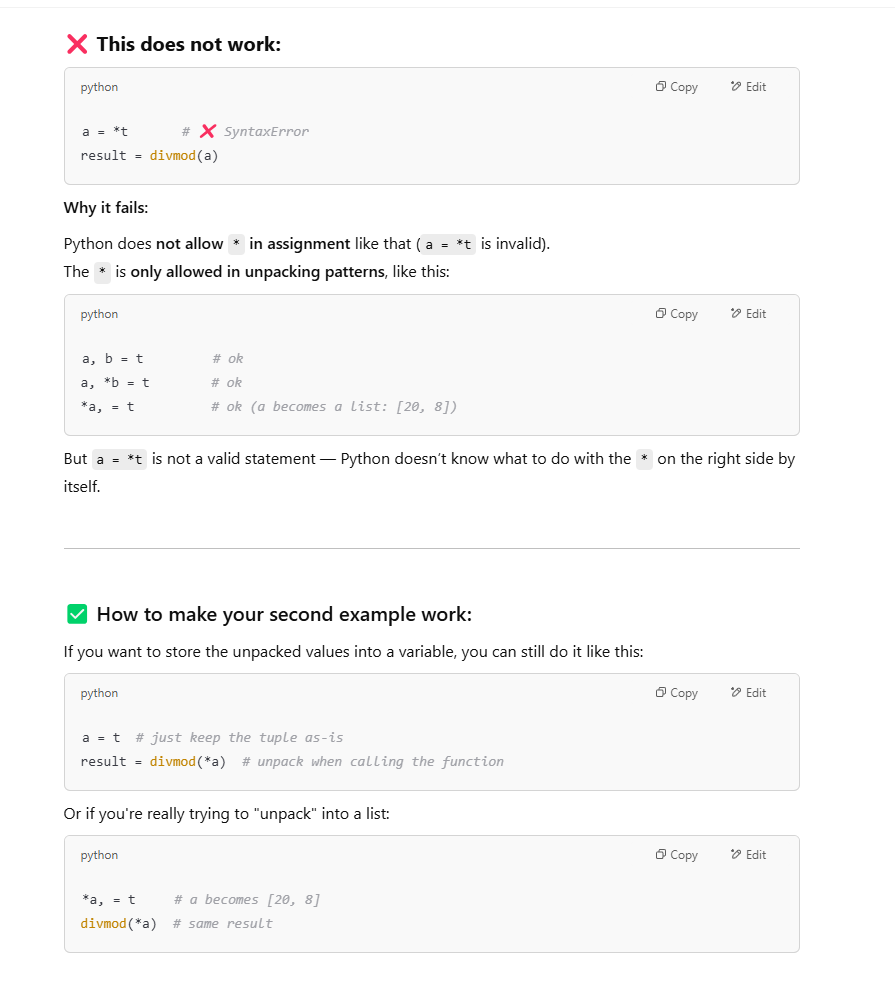

## unpack t to two args, then pass them to the func

In [13]:
quotient, remainder = divmod(*t)
quotient, remainder

(2, 4)

In [14]:
import os

_, filename = os.path.split('/home/luciano/.ssh/id_rsa.pub')
filename

'id_rsa.pub'

In [18]:
import os

a, filename = os.path.split('/home/luciano/.ssh/id_rsa.pub')
a

'/home/luciano/.ssh'

### Using * to grab excess items

In [19]:
a, b, *rest = range(5)
a, b, rest

(0, 1, [2, 3, 4])

In [ ]:
a = [1, 2, 3]
# *a #can't use starred expression here
# *b = [1, 2, 3] #SyntaxError: starred assignment target must be in a list or tuple
# *b = (1, 2, 3)
# *b = tuple(a)

SyntaxError: starred assignment target must be in a list or tuple (1910744739.py, line 5)

In [20]:
a, b, *rest = range(3)
a, b, rest

(0, 1, [2])

In [21]:
a, b, *rest = range(2)
a, b, rest

(0, 1, [])

In [22]:
a, *body, c, d = range(5)
a, body, c, d

(0, [1, 2], 3, 4)

In [23]:
*head, b, c, d = range(5)
head, b, c, d

([0, 1], 2, 3, 4)

### Unpacking with * in function calls and sequence literals

In [26]:
def fun(a, b, c, d, *rest):
    print(f"a = {a}, b = {b}, c = {c}, d = {d}")
    print(rest)
    return a, b, c, d, rest


fun(*[1, 2], 3, *range(4, 7))
# a,b = *[1, 2], c = 3, d,*rest = *range(4, 7)

a = 1, b = 2, c = 3, d = 4
(5, 6)


(1, 2, 3, 4, (5, 6))

In [27]:
range(4)

range(0, 4)

In [28]:
*range(4), 4

(0, 1, 2, 3, 4)

In [29]:
[*range(4), 4]

[0, 1, 2, 3, 4]

In [35]:
{*range(4), 4, *(5, 6, 7)}

{0, 1, 2, 3, 4, 5, 6, 7}

unpacking 就是把（）中的数用*取出来

### Nested unpacking
#### Example 2-8. Unpacking nested tuples to access the longitude

[02-array-seq/metro_lat_lon.py](02-array-seq/metro_lat_lon.py)

In [30]:
# tag::MAIN[]
metro_areas = [
    ('Tokyo', 'JP', 36.933, (35.689722, 139.691667)),  # <1>
    ('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
    ('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
    ('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
    ('São Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
]

def test():
    print(f'{"":15} | {"latitude":>9} | {"longitude":>9}')
    for name, _, _, (lat, lon) in metro_areas:  # <2>
        if lon <= 0:  # <3>
            print(f'{name:15} | {lat:9.4f} | {lon:9.4f}')
            
            
test()

                |  latitude | longitude
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
São Paulo       |  -23.5478 |  -46.6358


## Pattern Matching with Sequences
#### Example 2-9. Method from an imaginary Robot class

In [36]:
# def handle_command(self, message):
#     match message:
#         case ['BEEPER', frequency, times]:
#             self.beep(times, frequency)
#         case ['NECK', angle]:
#             self.rotate_neck(angle)
#         case ['LED', ident, intensity]:
#             self.leds[ident].set_brightness(ident, intensity)
#         case ['LED', ident, red, green, blue]:
#             self.leds[ident].set_color(ident, red, green, blue)
#         case _:
#             raise InvalidCommand(message)

#### Example 2-10. Destructuring nested tuples—requires Python ≥ 3.10.
[02-array-seq/match_lat_lon.py](02-array-seq/match_lat_lon.py)

In [37]:
metro_areas = [
    ('Tokyo', 'JP', 36.933, (35.689722, 139.691667)),
    ('Delhi NCR', 'IN', 21.935, (28.613889, 77.208889)),
    ('Mexico City', 'MX', 20.142, (19.433333, -99.133333)),
    ('New York-Newark', 'US', 20.104, (40.808611, -74.020386)),
    ('São Paulo', 'BR', 19.649, (-23.547778, -46.635833)),
]

def main():
    print(f'{"":15} | {"latitude":>9} | {"longitude":>9}')
    for record in metro_areas:
        match record:
            case [name, _, _, (lat, lon)] if lon <= 0:
                print(f'{name:15} | {lat:9.4f} | {lon:9.4f}')
main()

                |  latitude | longitude
Mexico City     |   19.4333 |  -99.1333
New York-Newark |   40.8086 |  -74.0204
São Paulo       |  -23.5478 |  -46.6358


### Pattern Matching Sequences in an Interpreter
#### Example 2-11. Matching patterns without match/case.
[02-array-seq/lispy/py3.9/lis.py](02-array-seq/lispy/py3.9/lis.py)

#### Example 2-12. Pattern matching with match/case—requires Python ≥ 3.10.
[02-array-seq/lispy/py3.10/lis.py](02-array-seq/lispy/py3.10/lis.py)

## Slicing

### Why Slices and Range Exclude the Last Item

In [38]:
l = [10, 20, 30, 40, 50, 60]

l[:2]  # split at 2

[10, 20]

In [39]:
l[2:]

[30, 40, 50, 60]

In [40]:
l[:3]  # split at 3

[10, 20, 30]

In [41]:
l[3:]

[40, 50, 60]

### Slice Objects

In [42]:
s = 'bicycle'
s[::3]

'bye'

负值的时候先倒过来，然后在处理，所以下面的第一个是e而不是b

In [43]:
s[::-1]

'elcycib'

In [44]:
s[::-2]

'eccb'

#### Example 2-13. Line items from a flat-file invoice

In [69]:
invoice = """
0.....6.................................40........52...55........
1909 Pimoroni PiBrella                      $17.50    3    $52.50
1489 6mm Tactile Switch x20                  $4.95    2    $9.90
1510 Panavise Jr. - PV-201                  $28.00    1    $28.00
1601 PiTFT Mini Kit 320x240                 $34.95    1    $34.95
"""

SKU = slice(0, 6, 2)
DESCRIPTION = slice(6, 40)
UNIT_PRICE = slice(40, 52)
QUANTITY = slice(52, 55)
ITEM_TOTAL = slice(55, None)

line_items = invoice.split('\n')[2:]

for item in line_items:
    print(item[SKU], item[UNIT_PRICE], item[DESCRIPTION])

10      $17.50   imoroni PiBrella                  
18       $4.95   mm Tactile Switch x20             
11      $28.00   anavise Jr. - PV-201              
10      $34.95   iTFT Mini Kit 320x240             
  


slice 返回一个obj、
seq[start:stop:step] = seq.__getitem__(slice(start, stop, step))

In [60]:
invoice.split('\n')

['',
 '0.....6.................................40........52...55........',
 '1909 Pimoroni PiBrella                      $17.50    3    $52.50',
 '1489 6mm Tactile Switch x20                  $4.95    2    $9.90',
 '1510 Panavise Jr. - PV-201                  $28.00    1    $28.00',
 '1601 PiTFT Mini Kit 320x240                 $34.95    1    $34.95',
 '']

slice 不仅用于取数也用于原地址修改数据

### Assigning to Slices

In [79]:
l = list(range(10))
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [80]:
l[2:5] = [20, 30]
l

[0, 1, 20, 30, 5, 6, 7, 8, 9]

In [81]:
del l[5:7]
l

[0, 1, 20, 30, 5, 8, 9]

In [82]:
l[3::2] = [11, 22]
l

[0, 1, 20, 11, 5, 22, 9]

By design, this example raises an exception::

In [83]:
try:
    l[2:5] = 100
except TypeError as e:
    print(repr(e))

TypeError('can only assign an iterable')


In [84]:
l[2:5] = [100]
l

[0, 1, 100, 22, 9]

## Using + and * with Sequences

In [52]:
l = [1, 2, 3]
l * 5

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [53]:
5 * 'abcd'

'abcdabcdabcdabcdabcd'

### Building Lists of Lists

#### Example 2-14. A list with three lists of length 3 can represent a tic-tac-toe board

In [54]:
board = [['_'] * 3 for i in range(3)]
board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [55]:
board[1][2] = 'X'
board

[['_', '_', '_'], ['_', '_', 'X'], ['_', '_', '_']]

#### Example 2-15. A list with three references to the same list is useless

In [56]:
weird_board = [['_'] * 3] * 3
weird_board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [57]:
weird_board[1][2] = 'O'
weird_board

[['_', '_', 'O'], ['_', '_', 'O'], ['_', '_', 'O']]

#### Explanation

In [58]:
board = []
for i in range(3):
    row = ['_'] * 3
    board.append(row)
board

[['_', '_', '_'], ['_', '_', '_'], ['_', '_', '_']]

In [59]:
board[2][0] = 'X'
board

[['_', '_', '_'], ['_', '_', '_'], ['X', '_', '_']]

## Augmented Assignment with Sequences

In [60]:
l = [1, 2, 3]
idl = id(l)

In [61]:
# NBVAL_IGNORE_OUTPUT
idl

140694277263808

In [62]:
l *= 2
l

[1, 2, 3, 1, 2, 3]

In [63]:
id(l) == idl  # same list

True

In [64]:
t = (1, 2, 3)
idt = id(t)

In [65]:
# NBVAL_IGNORE_OUTPUT
idt

140694329335488

In [66]:
t *= 2
id(t) == idt  # new tuple

False

### A += Assignment Puzzler
#### Example 2-16. A riddle

In [67]:
t = (1, 2, [30, 40])
try:
    t[2] += [50, 60]
except TypeError as e:
    print(repr(e))

TypeError("'tuple' object does not support item assignment")


#### Example 2-17. The unexpected result: item t2 is changed and an exception is raised

In [68]:
t

(1, 2, [30, 40, 50, 60])

#### Example 2-18. Bytecode for the expression s[a] += b

In [69]:
import dis

dis.dis('s[a] += b')

  1           0 LOAD_NAME                0 (s)
              2 LOAD_NAME                1 (a)
              4 DUP_TOP_TWO
              6 BINARY_SUBSCR
              8 LOAD_NAME                2 (b)
             10 INPLACE_ADD
             12 ROT_THREE
             14 STORE_SUBSCR
             16 LOAD_CONST               0 (None)
             18 RETURN_VALUE


## list.sort and the sorted Built-In Function

In [85]:
fruits = ['grape', 'raspberry', 'apple', 'banana']
sorted(fruits)

['apple', 'banana', 'grape', 'raspberry']

In [71]:
fruits

['grape', 'raspberry', 'apple', 'banana']

In [72]:
sorted(fruits, reverse=True)

['raspberry', 'grape', 'banana', 'apple']

In [73]:
sorted(fruits, key=len)

['grape', 'apple', 'banana', 'raspberry']

In [74]:
sorted(fruits, key=len, reverse=True)

['raspberry', 'banana', 'grape', 'apple']

In [75]:
fruits

['grape', 'raspberry', 'apple', 'banana']

In [76]:
fruits.sort()
fruits

['apple', 'banana', 'grape', 'raspberry']

list.sort 是in place sort 返回空， sort方法返回一个新的list

## When a List Is Not the Answer

### Arrays

Array save memory against list

#### Example 2-19. Creating, saving, and loading a large array of floats

In [86]:
from array import array
from random import random, seed
seed(10)  # Use seed to make the output consistent

floats = array('d', (random() for i in range(10 ** 7)))
floats[-1]

0.8190492979077034

In [87]:
with open('floats.bin', 'wb') as fp:
    floats.tofile(fp)

In [88]:
floats2 = array('d')

with open('floats.bin', 'rb') as fp:
    floats2.fromfile(fp, 10 ** 7)

floats2[-1]

0.8190492979077034

In [89]:
floats2 == floats

True

### Memory Views

#### Example 2-20. Handling 6 bytes memory of as 1×6, 2×3, and 3×2 views

In [81]:
octets = array('B', range(6))
m1 = memoryview(octets)
m1.tolist()

[0, 1, 2, 3, 4, 5]

In [82]:
m2 = m1.cast('B', [2, 3])
m2.tolist()

[[0, 1, 2], [3, 4, 5]]

In [83]:
m3 = m1.cast('B', [3, 2])
m3.tolist()

[[0, 1], [2, 3], [4, 5]]

In [84]:
m2[1,1] = 22
m3[1,1] = 33
octets

array('B', [0, 1, 2, 33, 22, 5])

#### Example 2-21. Changing the value of an 16-bit integer array item by poking one of its bytes

In [85]:
numbers = array('h', [-2, -1, 0, 1, 2])
memv = memoryview(numbers)
len(memv)

5

In [86]:
memv[0]

-2

In [87]:
memv_oct = memv.cast('B')
memv_oct.tolist()

[254, 255, 255, 255, 0, 0, 1, 0, 2, 0]

In [88]:
memv_oct[5] = 4
numbers

array('h', [-2, -1, 1024, 1, 2])

### NumPy

#### Example 2-22. Basic operations with rows and columns in a numpy.ndarray

In [89]:
import numpy as np

a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [90]:
type(a)

numpy.ndarray

In [91]:
a.shape

(12,)

In [92]:
a.shape = 3, 4
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [93]:
a[2]

array([ 8,  9, 10, 11])

In [94]:
a[2, 1]

9

In [95]:
a[:, 1]

array([1, 5, 9])

In [96]:
a.transpose()

array([[ 0,  4,  8],
       [ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11]])

#### Example 2-22. Loading, saving, and vectorized operations

In [97]:
with open('floats-1M-lines.txt', 'wt') as fp:
    for _ in range(1_000_000):
        fp.write(f'{random()}\n')

In [98]:
floats = np.loadtxt('floats-1M-lines.txt')

In [99]:
floats[-3:]

array([0.06078257, 0.61741189, 0.84349987])

In [100]:
floats *= .5
floats[-3:]

array([0.03039128, 0.30870594, 0.42174994])

In [101]:
from time import perf_counter as pc

t0 = pc()
floats /= 3
(pc() - t0) < 0.01

True

In [102]:
np.save('floats-1M', floats)
floats2 = np.load('floats-1M.npy', 'r+')
floats2 *= 6

In [103]:
floats2[-3:]

memmap([0.06078257, 0.61741189, 0.84349987])

### Deques and Other Queues

#### Example 2-23. Working with a deque

But inserting and removing from the head of a list (the 0-index end) is costly because the entire list must be shifted in memory.

list 从头插入或者删除，是非常costly的操作，因为整个list的内容都要移动

The class collections.deque is a thread-safe double-ended queue designed for fast inserting and removing from both ends. 

In [104]:
import collections

dq = collections.deque(range(10), maxlen=10)
dq

deque([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [105]:
dq.rotate(3)
dq

deque([7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

rotate 大于0，从右往左找到对应元素，然后整体搬到前面

In [106]:
dq.rotate(-4)
dq

deque([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

In [107]:
dq.appendleft(-1)
dq

deque([-1, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [108]:
dq.extend([11, 22, 33])
dq

deque([3, 4, 5, 6, 7, 8, 9, 11, 22, 33])

In [109]:
dq.extendleft([10, 20, 30, 40])
dq

deque([40, 30, 20, 10, 3, 4, 5, 6, 7, 8])

## Soapbox

### Mixed bag lists

In [110]:
l = [28, 14, '28', 5, '9', '1', 0, 6, '23', 19]

In [111]:
try:
    sorted(l)
except TypeError as e:
    print(repr(e))

TypeError("'<' not supported between instances of 'str' and 'int'")


### Key is Brilliant

In [112]:
l = [28, 14, '28', 5, '9', '1', 0, 6, '23', 19]

sorted(l, key=int)

[0, '1', 5, 6, '9', 14, 19, '23', 28, '28']

In [113]:
sorted(l, key=str)

[0, '1', 14, 19, '23', 28, '28', 5, 6, '9']